In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [2]:
# Las ecuaciones diferenciales del modelo SIR
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def plot(S, I, R, t, divide_by=1):
    # Dibujamos los datos de S(t), I(t) y R(t)
    fig, ax = plt.subplots()
    ax.plot(t, S / divide_by, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I / divide_by, 'r', alpha=0.5, lw=2, label='Infectado')
    ax.plot(t, R / divide_by, 'g', alpha=0.5, lw=2, label='Recuperado con inmunidad')
    ax.set_xlabel('Tiempo /días')
    ax.set_ylabel(f'Número (dividido por {divide_by:,})')
    legend = ax.legend()
    print("")
    # fig.show()
    
def plot_with_death_rate(S, I, R, t, divide_by=1, death_rate=0.05):
    # Dibujamos los datos de S(t), I(t) y R(t)
    fig, ax = plt.subplots()
    ax.plot(t, S / divide_by, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I / divide_by, 'r', alpha=0.5, lw=2, label='Infectado')
    RR = R * (1 - death_rate)
    DD = R - RR
    ax.plot(t, RR / divide_by, 'g', alpha=0.5, lw=2, label='Recuperado con inmunidad')
    ax.plot(t, DD / divide_by, 'k', alpha=0.5, lw=2, label='No recuperado')
    ax.set_xlabel('Tiempo /días')
    ax.set_ylabel(f'Número (dividido por {divide_by:,})')
    legend = ax.legend()
    print("")
    # fig.show()
    
# población inicial, N.
N = 47000000 # poblaciçon de un país como España

# Número inicial de infectados y recuperados, I0 and R0.
I0 = 10000
R0 = 0

# El resto, casi todo N, es susceptible de infectarse
S0 = N - I0 - R0

# Tasas de contagio y recuperación.
beta = 0.1 # contagio
gamma = 0.02 # recuperación

# Pasos temporales (en días)
t = np.linspace(0, 365, 365)

# condiciones iniciales
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

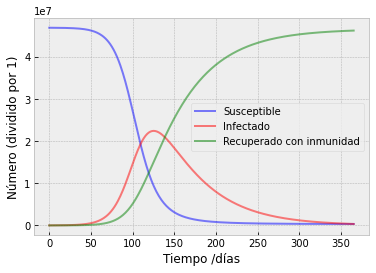

In [3]:
plot(S, I, R, t) # Datos sin normalizar

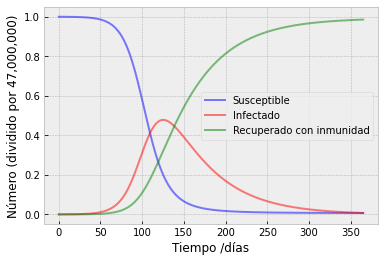

In [4]:
plot(S, I, R, t, divide_by=N) # Datos normalizados

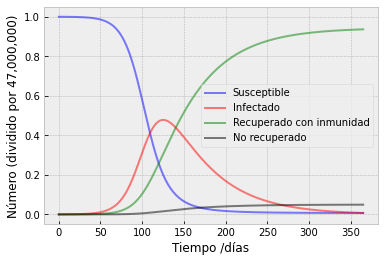

In [5]:
plot_with_death_rate(S, I, R, t, divide_by=N, death_rate=0.05)